# Simple Linear Regression Using Scikit Learn
### Problem Statement:
### Predicting Marks of the Students using the Number of Hours they have studied
This is a task of simple linear regression using two variables which are:
1. Student Marks
2. Number of Hours

Here the student marks will be dependent on the number of hours the student has studied. Thus, the Student Marks will be the dependent variable and the Number of Hours Studeied will be the dependent variable.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data from the given source and storing it in a Pandas Data Frame

In [3]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Visualizing the Data:
We will be plotting a graph with No. of Hours on the x-axis and Marks obtained on the y-axis to get a better understanding of the data and the distribution of the given data.

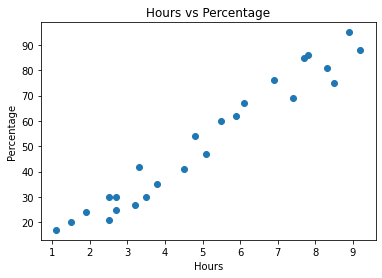

In [4]:
plt.scatter(list(df["Hours"]), list(df["Scores"]))
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.title('Hours vs Percentage')
plt.show()

In [5]:
X_independent = df.iloc[:, 0].values
Y_dependent = df.iloc[:, -1].values
X_independent = X_independent.reshape(-1,1)
# X_independent

### Understanding the relation between the two quantities:
To get a better understanding of the relation between the two quantities we will plot a heatmap of the correlation that is obtained....according to the heatmap it is clear that the Scores and the no. of Hours are dependent.

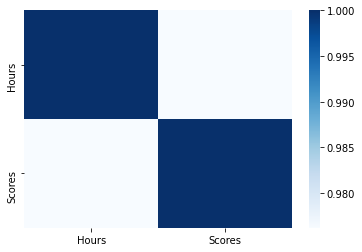

In [6]:
import seaborn as sns

sns.heatmap(df.corr(), cmap = 'Blues')
plt.show()

### The next step is to prepare data for training our model:
To do this we will be using the 'train_test_split' function of scikit learn. We will use 80% of the total data to tarin the model and 20% of the data to test the model. 

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_independent, Y_dependent,
                                                    test_size = 0.2, random_state = 0)
print("Training data: ")
print("Hours = {} \nPercentage = {}".format(x_train.reshape(1,-1), y_train))
print()
print("Test data: ")
print("Hours = {} \nPercentage = {}".format(x_test.reshape(1,-1), y_test))


Training data: 
Hours = [[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
  8.9 4.5]] 
Percentage = [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]

Test data: 
Hours = [[1.5 3.2 7.4 2.5 5.9]] 
Percentage = [20 27 69 30 62]


### Training the model :
We will be using the LinearRegression ML model for this task we will feed the the test data and wait for the tarining to end...after that our model is ready to be tested.

In [8]:
from sklearn.linear_model import LinearRegression
print("Training started.....")
reg = LinearRegression()
reg.fit(x_train, y_train)
print("Training completed.")

Training started.....
Training completed.


### Visualization of the regression line generated by the model:
This plot will give us a better understanding of the output of our model. The plot will be scatter plot of the data points along with the the regression line.

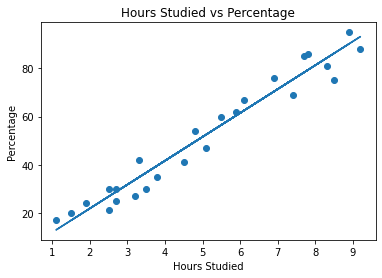

In [9]:
line = reg.coef_*X_independent + reg.intercept_

plt.scatter(X_independent, Y_dependent)
plt.plot(X_independent, line)
plt.title('Hours Studied vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage")
plt.show()

### Testing our model:
Feeding the test data to ou model and check the output, the output will be a data frame will the actual values and predicted values.

In [10]:
pred = x_test
pred_results = reg.predict(pred)
result = pd.DataFrame((y_test, pred_results), index = ['Expected', 'Predicted']).T
result["Difference"] = result["Expected"] - result["Predicted"]
result

,Expected,Predicted,Difference
0,20.0,16.884145,3.115855
1,27.0,33.732261,-6.732261
2,69.0,75.357018,-6.357018
3,30.0,26.794801,3.205199
4,62.0,60.491033,1.508967


### Trying to predict Student Marks if he/ she studies for 9.25 Hrs.
The model gives a prediction that the percentage obtained will be arround **93.7%**

In [11]:
test_data = [[9.25]]
pred_res = reg.predict(test_data)
print("Hours : {}".format(test_data[0][0]))
print("Predicted Percentage : {}".format(pred_res))

Hours : 9.25
Predicted Percentage : [93.69173249]


### Checking the accuracy of our model:
There are many ways to determine the accuracy of our model I have used the mean_absolute_error and the r2_score for determining the accuracy:
As you can see the result below:

**mean_absolute_error = 4.18** 

**r2_score = 0.9454** which is approx. **94.54%**  

In [12]:
from sklearn import metrics
value = metrics.mean_absolute_error(y_test, pred_results)
print('The Mean_absolute_error: ', value)

The Mean_absolute_error:  4.183859899002975


In [13]:
accuracy = metrics.r2_score(y_test, pred_results)
print("The r2_sore : ", accuracy)

The r2_sore :  0.9454906892105355
